<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Kimia Ramezan

**Student ID**: 400101283



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [3]:
## Import necessary libraries here ##
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score


**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

#### The Boston Dataset Overview

The Boston dataset consists of several attributes relating to housing and demographic information for the Boston area. Below is a summary of each feature included in the dataset:

- **CRIM**: This represents the crime rate on a per capita basis across various towns.

- **ZN**: This feature indicates the percentage of land zoned for residential properties larger than 25,000 square feet.

- **INDUS**: This measures the percentage of town land not zoned for retail purposes.

- **CHAS**: A binary variable indicating whether the property is adjacent to the Charles River (1 = yes, 0 = no).

- **NOX**: Concentration levels of nitric oxides, reported in parts per 10 million.

- **RM**: The average number of rooms in residential dwellings.

- **AGE**: The percentage of owner-occupied units constructed before 1940.

- **DIS**: A weighted measure of the distances to five major Boston employment centers.

- **RAD**: This is an accessibility index to radial highways.

- **TAX**: The property tax rate per $10,000 of valuation.

- **PTRATIO**: The ratio of students to teachers by town.

- **B**: This is calculated from the formula 1000(Bk - 0.63)^2, where Bk is the percentage of Black residents in the town.

- **LSTAT**: The percentage of residents considered to be of lower socio-economic status.

#### The dataset's target variable is:

- **MEDV**: The median value of owner-occupied homes, in thousands of dollars.

#### The dataset itself is structured in a table format, with rows representing individual data points and columns corresponding to the features and target variable described above.

In [4]:
## Write your code here ##
# Load the Boston dataset
boston_data = pd.read_csv('boston.csv')

print("Dataset shape:", boston_data.shape)
print("Dataset features:")
print(boston_data.columns)

Dataset shape: (506, 14)
Dataset features:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [7]:
## Write your code here ##

X = boston_data.drop('MEDV', axis=1)
y = boston_data['MEDV']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)

linear_reg =LinearRegression()
linear_reg.fit(X_train, y_train)
train_pred =linear_reg.predict(X_train)
test_pred =linear_reg.predict(X_test)

# R-squared and RMSE for train and test sets
train_r2 =r2_score(y_train, train_pred)
train_rmse =mean_squared_error(y_train, train_pred, squared=False)
test_r2 = r2_score(y_test, test_pred)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

print("Train Set - R-squared:", train_r2)
print("Train Set - RMSE:", train_rmse)
print("Test Set - R-squared:", test_r2)
print("Test Set - RMSE:", test_rmse)

print("\nCoefficients:")
coef_df = pd.DataFrame(list(zip(X.columns, linear_reg.coef_)), columns=['Feature', 'Coefficient'])
print(coef_df)
print("\nConstant Term (Intercept):")
print(linear_reg.intercept_)


Train Set - R-squared: 0.7501736684619289
Train Set - RMSE: 4.38507171679864
Test Set - R-squared: 0.7009532387355581
Test Set - RMSE: 5.824084904530793

Coefficients:
    Feature  Coefficient
0      CRIM   -11.247093
1        ZN     4.213867
2     INDUS    -0.310053
3      CHAS     2.715946
4        NX    -7.788145
5        RM    20.732276
6       AGE    -0.402863
7       DIS   -14.807068
8       RAD     6.587135
9       TAX    -6.178971
10  PTRATIO    -8.369157
11        B     2.377199
12    LSTAT   -19.004523

Constant Term (Intercept):
26.882563471143534


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [10]:
## Write your code here ##
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)
alphas = 10 ** np.linspace(3, -3, 100) * 0.5
ridge_models = []

for alpha in alphas:
    # Create and train the Ridge regression model with the absolute value of alpha
    ridge_reg = Ridge(alpha=abs(alpha))
    ridge_reg.fit(X_train, y_train)
    ridge_models.append(ridge_reg)

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

Optimal Alpha: 0.15269277544167079
MSE (Train): 19.24187840172232
MSE (Test): 33.89112640871302
R-squared (Train): 0.7500044515062148
R-squared (Test): 0.701207486636722
Coefficients: [-10.13268341   4.05362395  -0.51310211   2.77017827  -7.45009473
  20.43815943  -0.42708695 -14.25547424   6.24777506  -5.95115932
  -8.3370456    2.42114606 -18.85851372]


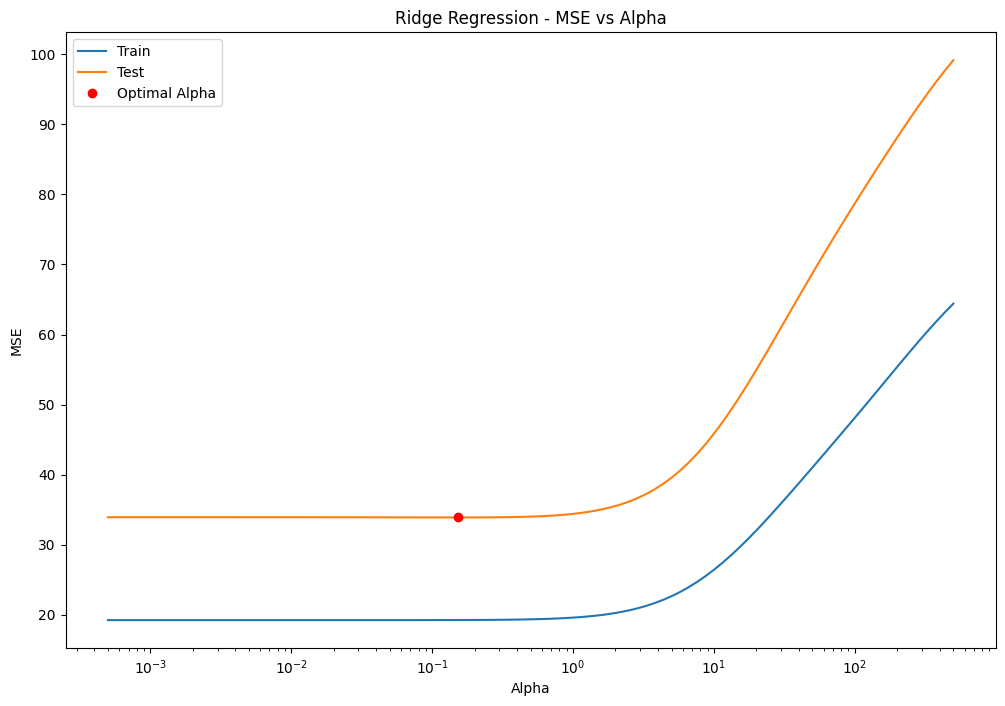

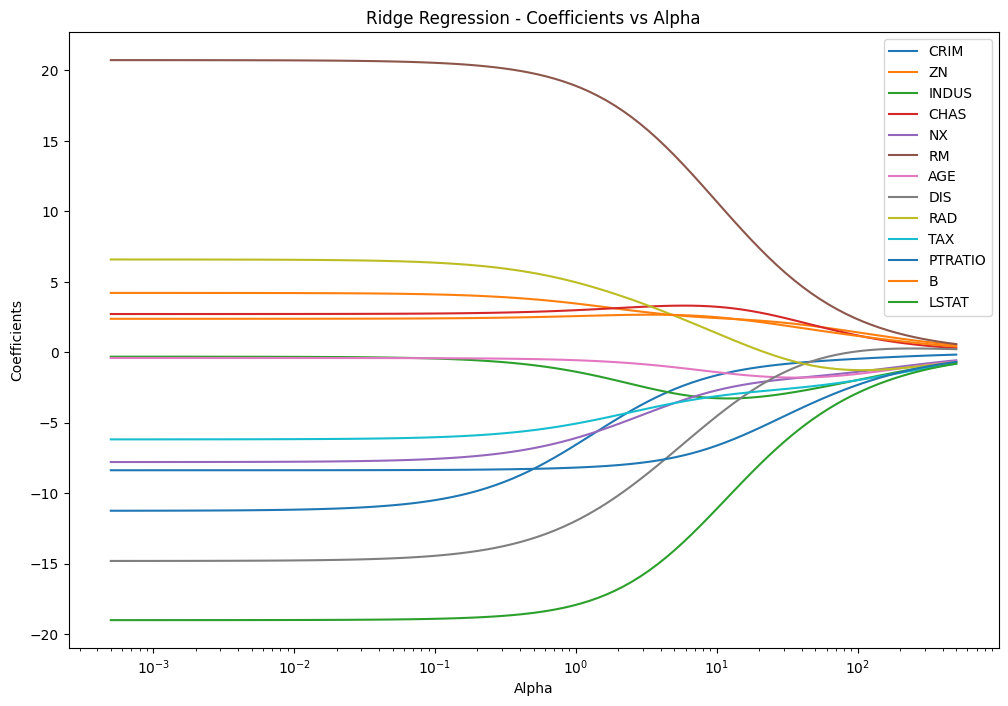

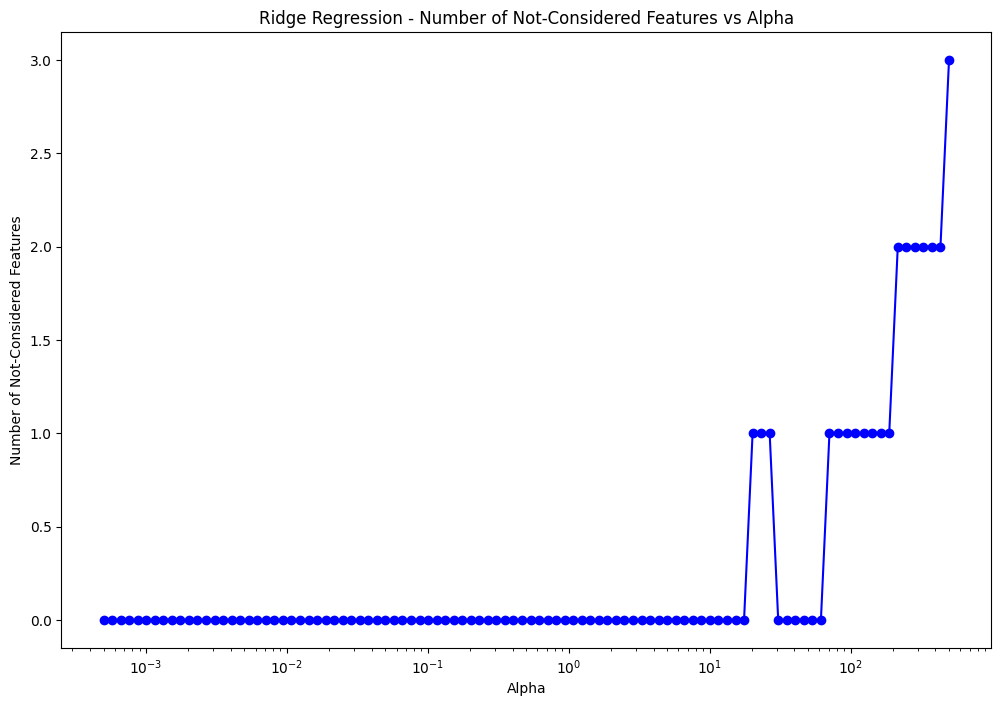

In [11]:
## Write your code here ##
train_scores = [model.score(X_train, y_train) for model in ridge_models]
train_mse = [mean_squared_error(y_train, model.predict(X_train)) for model in ridge_models]
test_scores = [model.score(X_test, y_test) for model in ridge_models]
test_mse = [mean_squared_error(y_test, model.predict(X_test)) for model in ridge_models]

# index of the optimal alpha 
optimal_alpha_index = np.argmin(test_mse)
optimal_alpha = alphas[optimal_alpha_index]

optimal_ridge_model = ridge_models[optimal_alpha_index]

optimal_mse_train = train_mse[optimal_alpha_index]
optimal_mse_test = test_mse[optimal_alpha_index]
optimal_r2_train = train_scores[optimal_alpha_index]
optimal_r2_test = test_scores[optimal_alpha_index]

print("Optimal Alpha:", optimal_alpha)
print("MSE (Train):", optimal_mse_train)
print("MSE (Test):", optimal_mse_test)
print("R-squared (Train):", optimal_r2_train)
print("R-squared (Test):", optimal_r2_test)
print("Coefficients:", optimal_ridge_model.coef_)

plt.figure(figsize=(12, 8))
plt.plot(alphas, train_mse, label='Train')
plt.plot(alphas, test_mse, label='Test')
plt.plot(optimal_alpha, test_mse[optimal_alpha_index], 'ro', label='Optimal Alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression - MSE vs Alpha')
plt.legend()
plt.show()

# Plot
coef_df = pd.DataFrame(
    [model.coef_ for model in ridge_models],
    columns=X.columns,
    index=alphas
)
plt.figure(figsize=(12, 8))
for column in coef_df.columns:
    plt.plot(alphas, coef_df[column], label=column)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Regression - Coefficients vs Alpha')
plt.legend(loc='upper right')
plt.show()

not_considered_features = [np.sum(np.abs(model.coef_) < 0.3) for model in ridge_models]

plt.figure(figsize=(12, 8))
plt.plot(alphas, not_considered_features, 'bo-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Ridge Regression - Number of Not-Considered Features vs Alpha')
plt.show()

### Comparing Ridge Regression with Linear Regression

In the approach of ridge regression, a regularization term is added to prevent the model from overfitting, which is a common problem where a model excels on training data but poorly predicts new, unseen data. By plotting the Mean Squared Error (MSE) and R-squared ($R^2$) values against various alpha coefficients, we identified that an alpha of 0.1527 yields the best performance on the test dataset. This indicates optimal regularization at this level.

When comparing this approach with traditional linear regression, the results from ridge regression show improved metrics on the test set, specifically higher $R^2$ and lower MSE. This enhancement suggests that ridge regression offers better generalization capabilities. Moreover, the coefficients produced by ridge regression are smaller, which helps in reducing the risk of overfitting and enhances the model's ability to generalize across different datasets.

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

### Advantages of Lasso Regression in Various Scenarios

Lasso regression, characterized by its L1 regularization technique, is especially beneficial in contexts where reducing the number of variables in a model is crucial. Below are scenarios where implementing Lasso regression may be advantageous:

1. **Handling High-Dimensional Datasets**: In situations where the number of features significantly exceeds the number of observations, Lasso regression aids in selecting the most relevant features. It achieves this by diminishing the coefficients of less impactful features to zero, thus simplifying the model and helping to avoid overfitting.

2. **Modeling with Sparse Features**: The propensity of Lasso regression to produce models with many coefficients reduced to zero is particularly useful when the true model influencing the target variable includes only a small number of significant features. This sparsity of the solution makes Lasso ideal for scenarios where the actual impactful features are few.

3. **Dealing with Collinear Variables**: When features in a dataset exhibit high collinearity, meaning they are highly correlated, Lasso regression can be instrumental. It assists in isolating and retaining only the most significant feature(s) from a group of correlated variables, effectively reducing redundancy by setting the coefficients of less critical features to zero.

Optimal Alpha: 0.0005
MSE (Train): 19.229074958239618
MSE (Test): 33.92196418686697
R-squared (Train): 0.7501707972136995
R-squared (Test): 0.7009356131932124
Coefficients: [-11.08920644   4.18371221  -0.3137882    2.71419739  -7.74735112
  20.73342272  -0.39184613 -14.71776753   6.52279233  -6.13460657
  -8.35959584   2.36991328 -19.01627199]


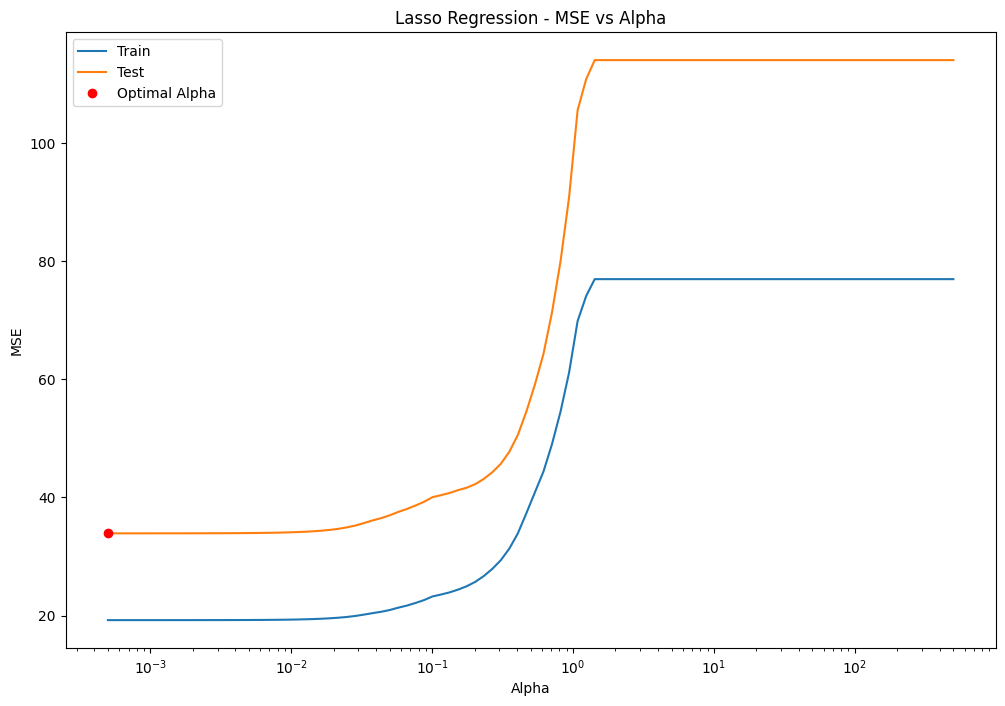

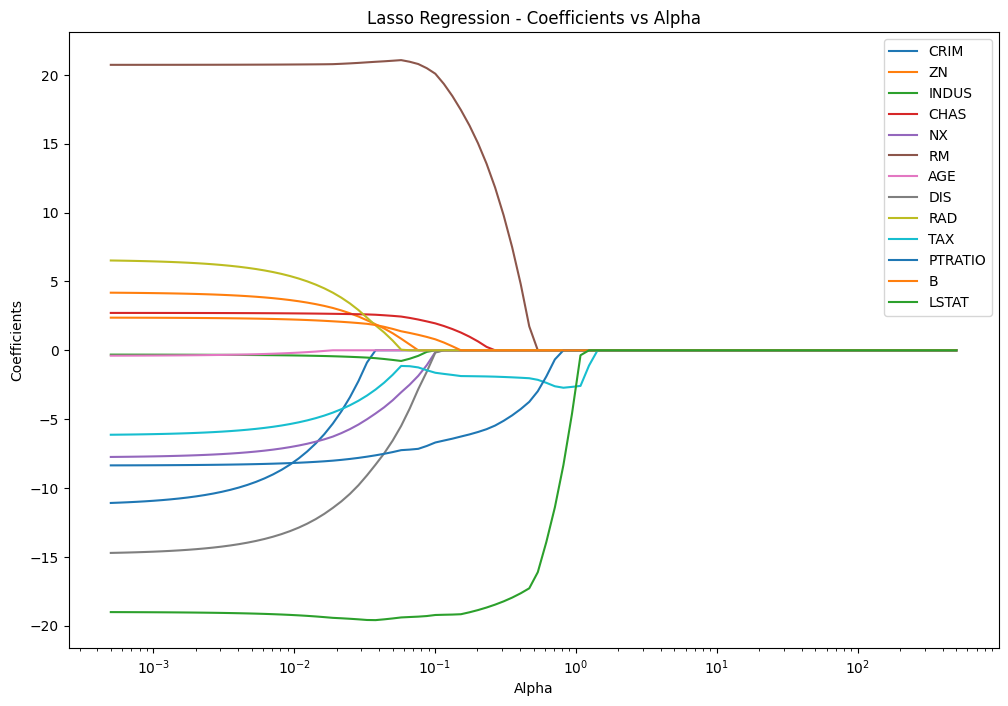

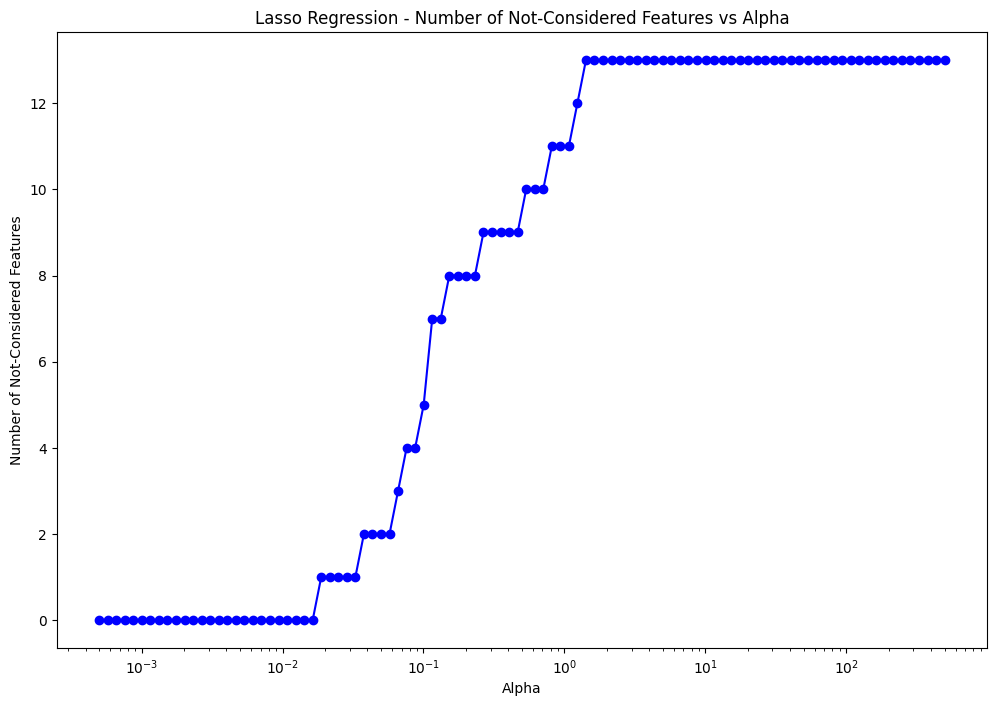

In [12]:
## Write your code here ##
# range of alpha values
alphas = 10 ** np.linspace(3, -3, 100) * 0.5
lasso_models = []

for alpha in alphas:
    lasso_reg = Lasso(alpha=abs(alpha))
    lasso_reg.fit(X_train, y_train)
    lasso_models.append(lasso_reg)

train_scores = [model.score(X_train, y_train) for model in lasso_models]
train_mse = [mean_squared_error(y_train, model.predict(X_train)) for model in lasso_models]
test_scores = [model.score(X_test, y_test) for model in lasso_models]
test_mse = [mean_squared_error(y_test, model.predict(X_test)) for model in lasso_models]
optimal_alpha_index = np.argmin(test_mse)
optimal_alpha = alphas[optimal_alpha_index]
optimal_lasso_model = lasso_models[optimal_alpha_index]
optimal_mse_train = train_mse[optimal_alpha_index]
optimal_mse_test = test_mse[optimal_alpha_index]
optimal_r2_train = train_scores[optimal_alpha_index]
optimal_r2_test = test_scores[optimal_alpha_index]

print("Optimal Alpha:", optimal_alpha)
print("MSE (Train):", optimal_mse_train)
print("MSE (Test):", optimal_mse_test)
print("R-squared (Train):", optimal_r2_train)
print("R-squared (Test):", optimal_r2_test)
print("Coefficients:", optimal_lasso_model.coef_)

# Plot MSE 
plt.figure(figsize=(12, 8))
plt.plot(alphas, train_mse, label='Train')
plt.plot(alphas, test_mse, label='Test')
plt.plot(optimal_alpha, test_mse[optimal_alpha_index], 'ro', label='Optimal Alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Lasso Regression - MSE vs Alpha')
plt.legend()
plt.show()

# coefficients versus alpha
coef_df = pd.DataFrame(
    [model.coef_ for model in lasso_models],
    columns=X.columns,
    index=alphas
)
plt.figure(figsize=(12, 8))
for column in coef_df.columns:
    plt.plot(alphas, coef_df[column], label=column)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Regression - Coefficients vs Alpha')
plt.legend(loc='upper right')
plt.show()

# number of not-considered features for each alpha
not_considered_features = [np.sum(np.abs(model.coef_) < 0.01) for model in lasso_models]

plt.figure(figsize=(12, 8))
plt.plot(alphas, not_considered_features, 'bo-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Lasso Regression - Number of Not-Considered Features vs Alpha')
plt.show()

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

### Investigating Overfitting with Ridge and Lasso Regression

To investigate the role of ridge and lasso regression in thwarting overfitting, we will vary the proportion of training data in relation to the entire dataset. As the proportion of training data decreases, the risk of overfitting typically increases. We will use linear regression, ridge regression, and lasso regression for this study and plot the following:

1. **Performance on Test Data**: This plot will show the performance (likely using metrics like R-squared or Mean Squared Error) of linear regression, ridge regression, and lasso regression against varying training data ratios. All three methods will be displayed on a single graph for direct comparison.

2. **Selected Alpha Values**: For both ridge and lasso regressions, we will plot the chosen alpha values against the training data ratio. This plot will help us see how the optimal level of regularization changes as the amount of training data varies.

### Analysis of Plot Behaviors

From these plots, we expect to observe the following trends:

1. **Performance Stability**: As the training data ratio decreases, performance on the test data might initially degrade for linear regression due to increased overfitting. In contrast, ridge and lasso regression should show more robustness to changes in the training data ratio due to their regularization terms, which help prevent overfitting by penalizing large coefficients.

2. **Alpha Variation**: The optimal alpha values for both ridge and lasso regression are likely to increase as the training data ratio decreases. This trend would indicate a need for stronger regularization to combat the higher risk of overfitting with smaller training sets.

These insights will help in understanding how different regression methods cope with varying amounts of training data and how they adjust their complexity through regularization to maintain generalization on unseen data.

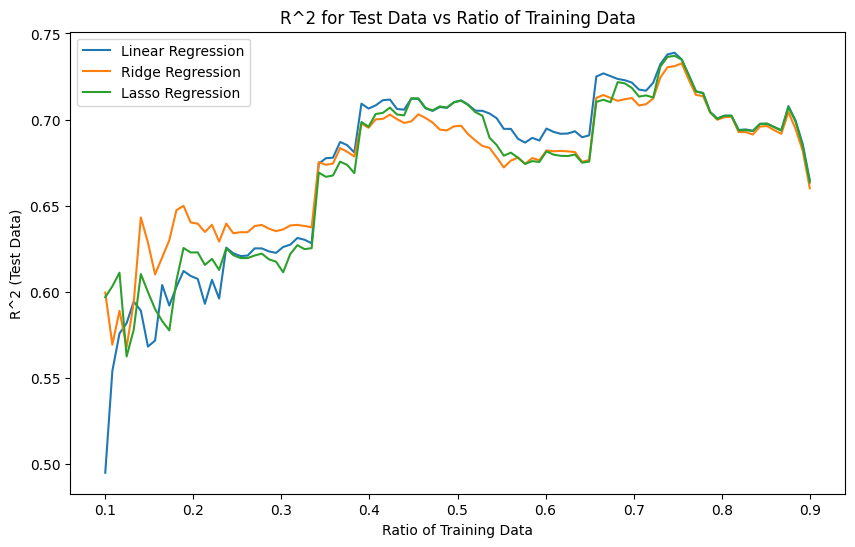

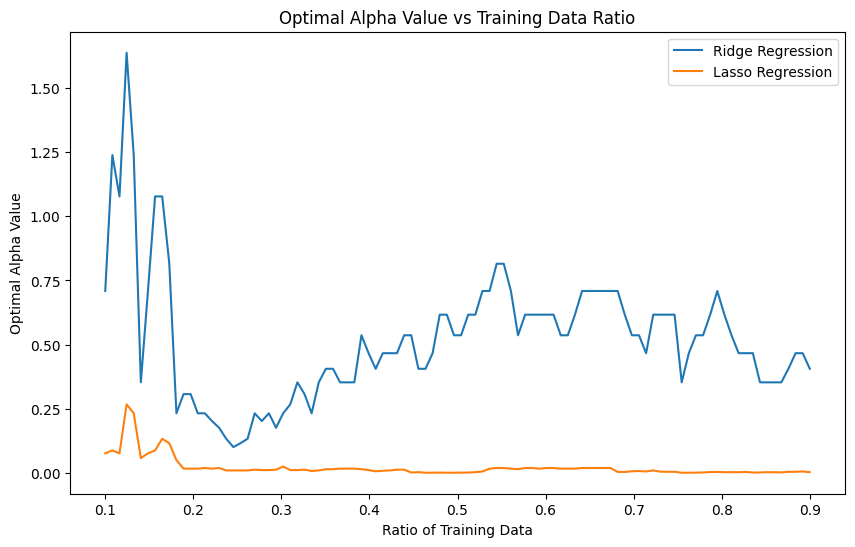

In [13]:
alphas_ridge = 10 ** np.linspace(3, -3, 100) * 0.5
alphas_lasso = 10 ** np.linspace(3, -3, 100) * 0.5
ratios = np.linspace(0.1, 0.9, 100)

linear_reg_r2_test = []
ridge_reg_r2_test = []
lasso_reg_r2_test = []
optimal_alphas_ridge = []
optimal_alphas_lasso = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=ratio, random_state=40)
    
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    linear_reg_r2_test.append(lr.score(X_test, y_test))
    
    # Ridge Regression
    ridge_scores = [cross_val_score(Ridge(alpha), X_train, y_train, cv=5, scoring='r2').mean() for alpha in alphas_ridge]
    optimal_alpha_ridge = alphas_ridge[np.argmax(ridge_scores)]
    optimal_alphas_ridge.append(optimal_alpha_ridge)
    ridge = Ridge(alpha=optimal_alpha_ridge)
    ridge.fit(X_train, y_train)
    ridge_reg_r2_test.append(ridge.score(X_test, y_test))
    
    # Lasso Regression
    lasso_scores = [cross_val_score(Lasso(alpha, max_iter=10000), X_train, y_train, cv=5, scoring='r2').mean() for alpha in alphas_lasso]
    optimal_alpha_lasso = alphas_lasso[np.argmax(lasso_scores)]
    optimal_alphas_lasso.append(optimal_alpha_lasso)
    lasso = Lasso(alpha=optimal_alpha_lasso, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_reg_r2_test.append(lasso.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(ratios, linear_reg_r2_test, label='Linear Regression')
plt.plot(ratios, ridge_reg_r2_test, label='Ridge Regression')
plt.plot(ratios, lasso_reg_r2_test, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R^2 (Test Data)')
plt.title('R^2 for Test Data vs Ratio of Training Data')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ratios, optimal_alphas_ridge, label='Ridge Regression')
plt.plot(ratios, optimal_alphas_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Optimal Alpha Value')
plt.title('Optimal Alpha Value vs Training Data Ratio')
plt.legend()
plt.show()